<IPython.core.display.Javascript object>


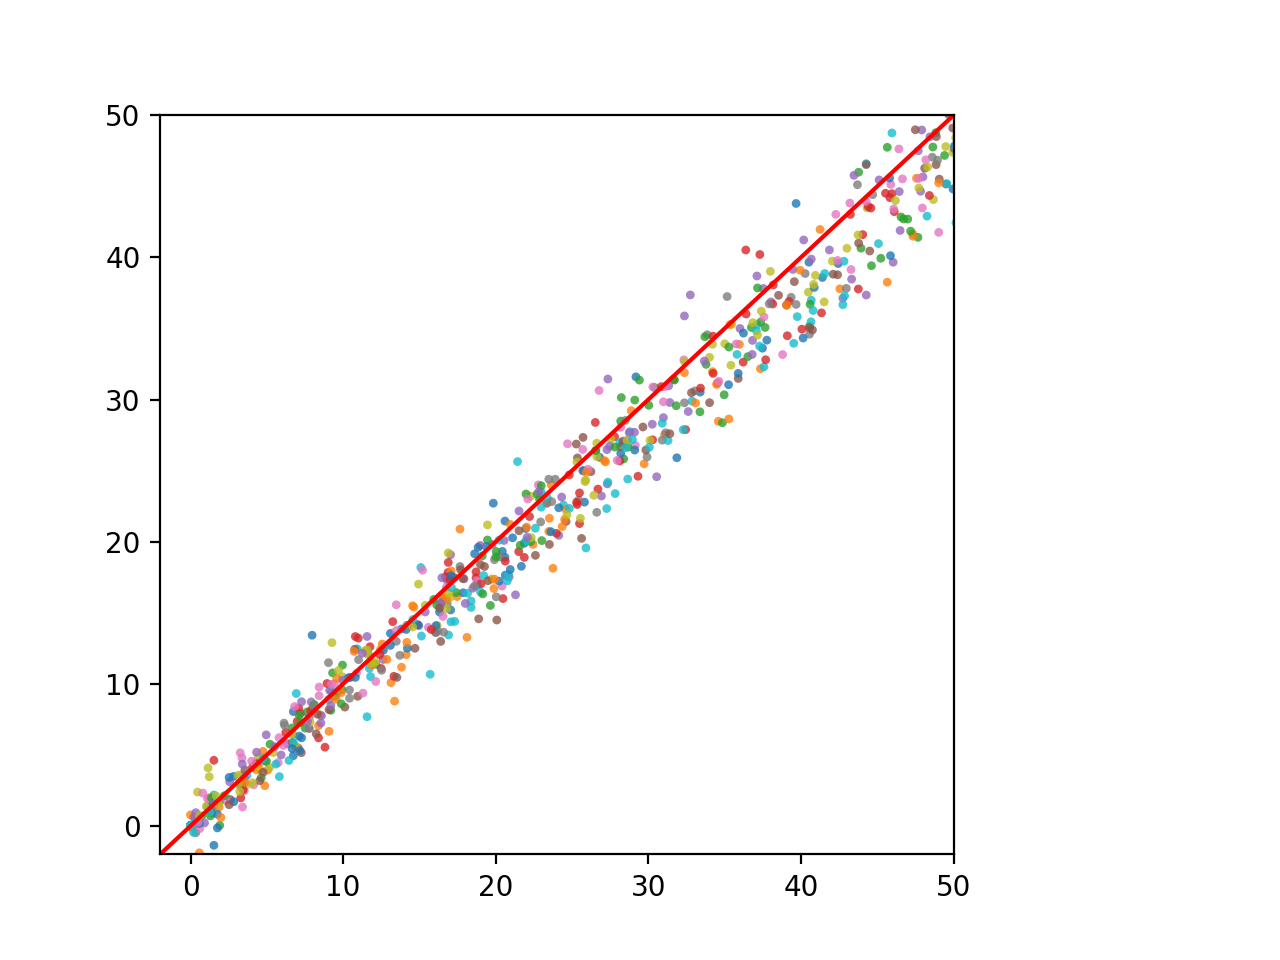

RMSE = 3.3657401631037063
RMSE = 3.0682084730433146
RMSE = 2.7701049911970923
RMSE = 2.5431261225411603
RMSE = 2.3920670860657167
RMSE = 2.211502546809586
RMSE = 2.1382208592712315
RMSE = 2.341508783114819
RMSE = 2.401460603065878
RMSE = 2.4096925630930968
RMSE = 2.351015284453665
RMSE = 2.3529677234568136
RMSE = 2.417986800753612
RMSE = 2.360754279993915
RMSE = 2.3187060659728123
RMSE = 2.940283318220297
RMSE = 3.594953408624891
RMSE = 3.512125966443324
RMSE = 3.505209243833465
RMSE = 3.4530112631812364
RMSE = 3.395154616674192
RMSE = 3.528313151281027
RMSE = 3.5380613782910073
RMSE = 3.521977576678226
RMSE = 3.473168250309161
RMSE = 3.4929223833835654
RMSE = 3.5255551981635387
RMSE = 3.519197668920804
RMSE = 3.4824091689994137
RMSE = 3.4824284463596076
RMSE = 3.5007397824357627
RMSE = 3.485538551216117
RMSE = 3.4455551911900817
RMSE = 3.4011457453942344
RMSE = 3.464145892992906
RMSE = 3.483208843643349
RMSE = 3.4687023264126924
RMSE = 3.5626535503785464
RMSE = 3.5251461996109423
RMSE

In [35]:
%matplotlib notebook

import os
import numpy as np
# import torchani
from torchani.data._pyanitools import anidataloader
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
box = ax.get_position()
plt.axis([-2, 50, -2, 50])
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

count = 0
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for data in anidataloader('./drugbank_wb97x_dz_xtb_ani.h5'):
    formula = data['path'].split('/')[-1]
    wb97x_dz_energy = data['wb97x_dz_energy']
    xtb_energy = data['xtb_energy']
    ani1ccx_energy = data['ani1ccx_energy'][:,-1]
    ani1x_energy = data['ani1x_energy'][:,-1]
    min_idx = np.argmin(ani1ccx_energy)
    wb97x_dz_energy = (wb97x_dz_energy - wb97x_dz_energy[min_idx]) * 627.509
    xtb_energy = (xtb_energy - xtb_energy[min_idx]) * 627.509
    ani1ccx_energy = (ani1ccx_energy - ani1ccx_energy[min_idx]) * 627.509
    ani1x_energy = (ani1x_energy - ani1x_energy[min_idx]) * 627.509
    
    if count == 0:
        x = ani1ccx_energy
        y = xtb_energy
    else:
        x = np.concatenate((x, ani1ccx_energy))
        y = np.concatenate((y, xtb_energy))
    
    A = np.vstack([x, np.ones(len(x))]).T
    model, resid = np.linalg.lstsq(A, y, rcond=None)[:2]
    m, c = model
    r2 = 1 - resid / (y.size * y.var())
    rmse = np.linalg.norm(m*x + c - y) / np.sqrt(len(x))
    print('RMSE =', rmse)
    x2 = np.linspace(start = -5.0, stop = 350, num = 356)

    ax.scatter(ani1ccx_energy, xtb_energy, edgecolors='none', s=10, alpha=0.8, c=colors[count % len(colors)])

    count += 1
    if count >= 100:
        # ax.plot(x2, m*x2 + c, 'r', label=('Fitted line, \ny = %8.5f x \n    + %8.5f, \nR^2 = %s' % (m, c, r2)))
        # ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
        ax.plot(x2, x2, 'r', label=('Line y = x'))
        plt.show()
        break


<IPython.core.display.Javascript object>


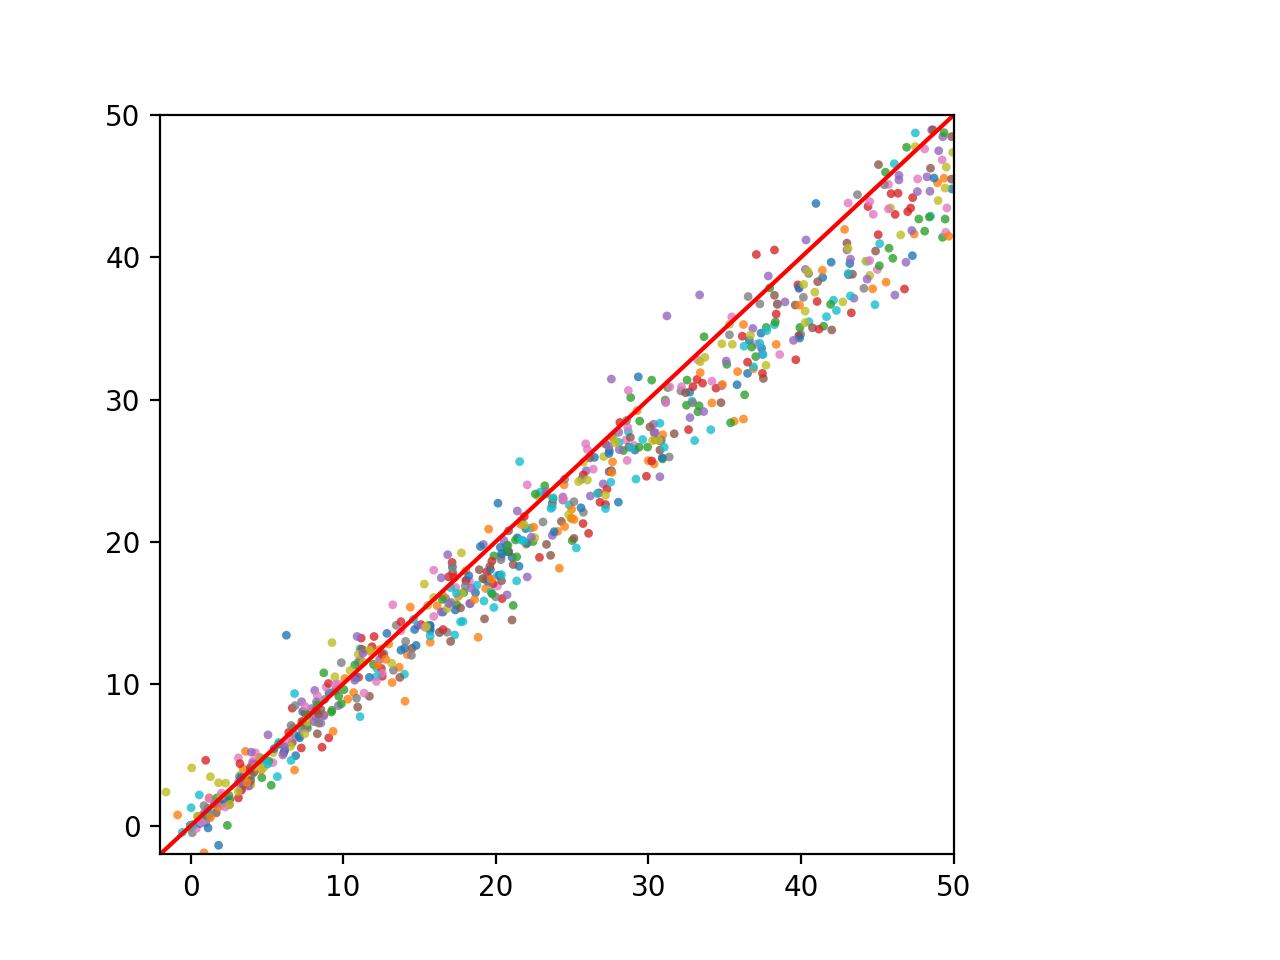

RMSE = 4.309662734969348
RMSE = 3.53219280019623
RMSE = 3.255429643969476
RMSE = 2.9564365722612562
RMSE = 2.758964126742631
RMSE = 2.566295436563136
RMSE = 2.43713954820129
RMSE = 2.4810297827533234
RMSE = 2.655761028862028
RMSE = 2.6220417428804996
RMSE = 2.5356184711584846
RMSE = 2.5135591853587056
RMSE = 2.536550628586926
RMSE = 2.5015032333780014
RMSE = 2.459850446890135
RMSE = 3.0734199921829437
RMSE = 3.636361467245065
RMSE = 3.548635965170147
RMSE = 3.6099335327425894
RMSE = 3.5603111823617475
RMSE = 3.4916468324614662
RMSE = 3.6216282681060883
RMSE = 3.61936842940732
RMSE = 3.5866226111022947
RMSE = 3.5429709452473395
RMSE = 3.53970832124554
RMSE = 3.592099273381658
RMSE = 3.579281025019679
RMSE = 3.5400118918011465
RMSE = 3.5283084566825997
RMSE = 3.6093161359806945
RMSE = 3.597228334568663
RMSE = 3.5545873376735013
RMSE = 3.510395739194655
RMSE = 3.5674139518915218
RMSE = 3.5997641641530254
RMSE = 3.6056718775198435
RMSE = 3.6498598618223865
RMSE = 3.6121365169544624
RMSE = 

In [37]:
%matplotlib notebook

import os
import numpy as np
# import torchani
from torchani.data._pyanitools import anidataloader
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
box = ax.get_position()
plt.axis([-2, 50, -2, 50])
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

count = 0
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for data in anidataloader('./drugbank_wb97x_dz_xtb_ani.h5'):
    formula = data['path'].split('/')[-1]
    wb97x_dz_energy = data['wb97x_dz_energy']
    xtb_energy = data['xtb_energy']
    ani1ccx_energy = data['ani1ccx_energy'][:,-1]
    ani1x_energy = data['ani1x_energy'][:,-1]
    min_idx = np.argmin(ani1ccx_energy)
    wb97x_dz_energy = (wb97x_dz_energy - wb97x_dz_energy[min_idx]) * 627.509
    xtb_energy = (xtb_energy - xtb_energy[min_idx]) * 627.509
    ani1ccx_energy = (ani1ccx_energy - ani1ccx_energy[min_idx]) * 627.509
    ani1x_energy = (ani1x_energy - ani1x_energy[min_idx]) * 627.509
    
    if count == 0:
        x = ani1x_energy
        y = xtb_energy
    else:
        x = np.concatenate((x, ani1x_energy))
        y = np.concatenate((y, xtb_energy))
    
    A = np.vstack([x, np.ones(len(x))]).T
    model, resid = np.linalg.lstsq(A, y, rcond=None)[:2]
    m, c = model
    r2 = 1 - resid / (y.size * y.var())
    rmse = np.linalg.norm(m*x + c - y) / np.sqrt(len(x))
    print('RMSE =', rmse)
    x2 = np.linspace(start = -5.0, stop = 350, num = 356)

    ax.scatter(ani1x_energy, xtb_energy, edgecolors='none', s=10, alpha=0.8, c=colors[count % len(colors)])

    count += 1
    if count >= 100:
        # ax.plot(x2, m*x2 + c, 'r', label=('Fitted line, \ny = %8.5f x \n    + %8.5f, \nR^2 = %s' % (m, c, r2)))
        # ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
        ax.plot(x2, x2, 'r', label=('Line y = x'))
        plt.show()
        break


<IPython.core.display.Javascript object>


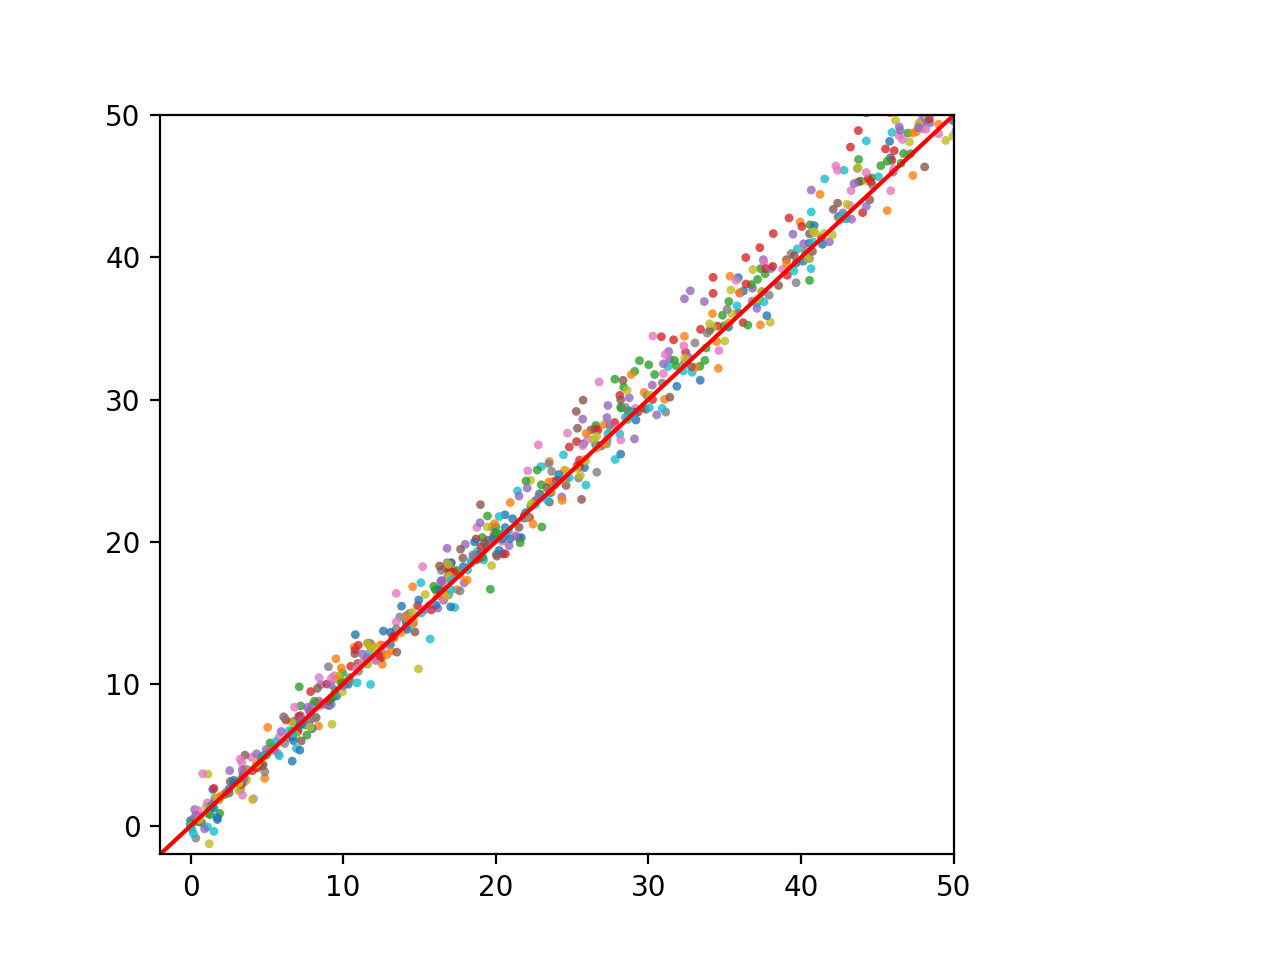

RMSE = 2.342336434103574
RMSE = 1.7930147647056702
RMSE = 1.739485399792069
RMSE = 1.5626233344680294
RMSE = 1.5218914463554072
RMSE = 1.450105338859779
RMSE = 1.3692720183358722
RMSE = 1.5765038903937016
RMSE = 1.5697722617423402
RMSE = 1.5311709352358016
RMSE = 1.4780564564190901
RMSE = 1.4684971060271548
RMSE = 1.591659721840804
RMSE = 1.5517155229828432
RMSE = 1.5205433545576124
RMSE = 1.6663292030941752
RMSE = 2.1981680454662955
RMSE = 2.1554278024468734
RMSE = 2.273595566717795
RMSE = 2.2571772468315223
RMSE = 2.2073961642389808
RMSE = 2.217859527131005
RMSE = 2.2041225954784465
RMSE = 2.2088131053034283
RMSE = 2.176907613193102
RMSE = 2.1567504204107157
RMSE = 2.1878301668749693
RMSE = 2.1761877689448443
RMSE = 2.1423953252714316
RMSE = 2.1192633064753386
RMSE = 2.1051201402560875
RMSE = 2.1331827388584297
RMSE = 2.1076885884178638
RMSE = 2.083965406749684
RMSE = 2.159467212077872
RMSE = 2.163258040436923
RMSE = 2.202467890265237
RMSE = 2.200701200140643
RMSE = 2.175000944494491

In [38]:
%matplotlib notebook

import os
import numpy as np
# import torchani
from torchani.data._pyanitools import anidataloader
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
box = ax.get_position()
plt.axis([-2, 50, -2, 50])
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

count = 0
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for data in anidataloader('./drugbank_wb97x_dz_xtb_ani.h5'):
    formula = data['path'].split('/')[-1]
    wb97x_dz_energy = data['wb97x_dz_energy']
    xtb_energy = data['xtb_energy']
    ani1ccx_energy = data['ani1ccx_energy'][:,-1]
    ani1x_energy = data['ani1x_energy'][:,-1]
    min_idx = np.argmin(ani1ccx_energy)
    wb97x_dz_energy = (wb97x_dz_energy - wb97x_dz_energy[min_idx]) * 627.509
    xtb_energy = (xtb_energy - xtb_energy[min_idx]) * 627.509
    ani1ccx_energy = (ani1ccx_energy - ani1ccx_energy[min_idx]) * 627.509
    ani1x_energy = (ani1x_energy - ani1x_energy[min_idx]) * 627.509
    
    if count == 0:
        x = ani1ccx_energy
        y = wb97x_dz_energy
    else:
        x = np.concatenate((x, ani1ccx_energy))
        y = np.concatenate((y, wb97x_dz_energy))
    
    A = np.vstack([x, np.ones(len(x))]).T
    model, resid = np.linalg.lstsq(A, y, rcond=None)[:2]
    m, c = model
    r2 = 1 - resid / (y.size * y.var())
    rmse = np.linalg.norm(m*x + c - y) / np.sqrt(len(x))
    print('RMSE =', rmse)
    x2 = np.linspace(start = -5.0, stop = 350, num = 356)

    ax.scatter(ani1ccx_energy, wb97x_dz_energy, edgecolors='none', s=10, alpha=0.8, c=colors[count % len(colors)])

    count += 1
    if count >= 100:
        # ax.plot(x2, m*x2 + c, 'r', label=('Fitted line, \ny = %8.5f x \n    + %8.5f, \nR^2 = %s' % (m, c, r2)))
        # ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
        ax.plot(x2, x2, 'r', label=('Line y = x'))
        plt.show()
        break


<IPython.core.display.Javascript object>


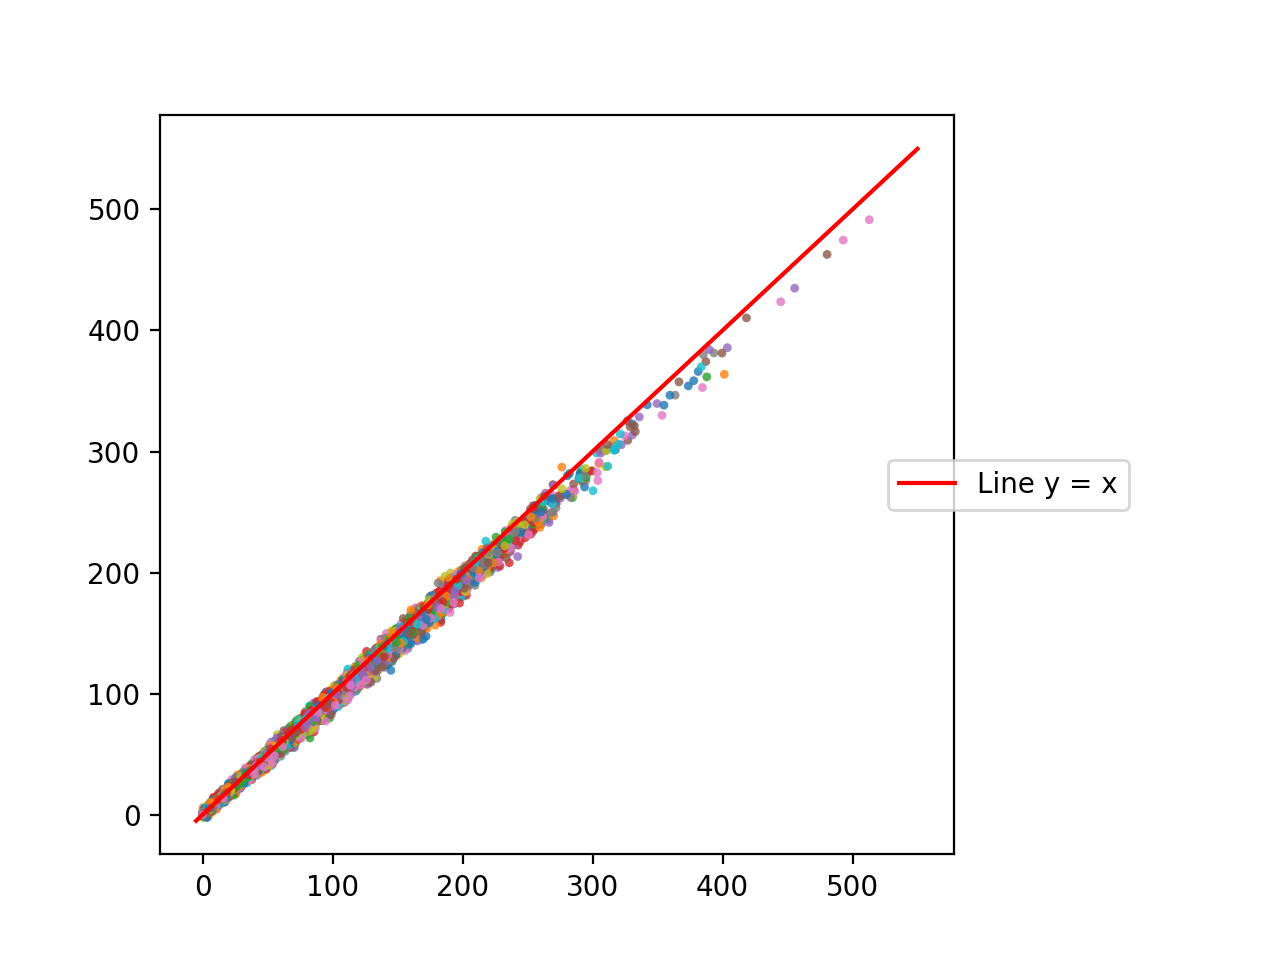

RMSE = 3.3657401631037063
RMSE = 3.0682084730433146
RMSE = 2.7701049911970923
RMSE = 2.5431261225411603
RMSE = 2.3920670860657167
RMSE = 2.211502546809586
RMSE = 2.1382208592712315
RMSE = 2.341508783114819
RMSE = 2.401460603065878
RMSE = 2.4096925630930968
RMSE = 2.351015284453665
RMSE = 2.3529677234568136
RMSE = 2.417986800753612
RMSE = 2.360754279993915
RMSE = 2.3187060659728123
RMSE = 2.940283318220297
RMSE = 3.594953408624891
RMSE = 3.512125966443324
RMSE = 3.505209243833465
RMSE = 3.4530112631812364
RMSE = 3.395154616674192
RMSE = 3.528313151281027
RMSE = 3.5380613782910073
RMSE = 3.521977576678226
RMSE = 3.473168250309161
RMSE = 3.4929223833835654
RMSE = 3.5255551981635387
RMSE = 3.519197668920804
RMSE = 3.4824091689994137
RMSE = 3.4824284463596076
RMSE = 3.5007397824357627
RMSE = 3.485538551216117
RMSE = 3.4455551911900817
RMSE = 3.4011457453942344
RMSE = 3.464145892992906
RMSE = 3.483208843643349
RMSE = 3.4687023264126924
RMSE = 3.5626535503785464
RMSE = 3.5251461996109423
RMSE

RMSE = 3.360735092040932
RMSE = 3.359881799914275
RMSE = 3.3559566104699727
RMSE = 3.359507508904512
RMSE = 3.3580819661959467
RMSE = 3.363056793510161
RMSE = 3.3587708099329174
RMSE = 3.3581519471634675
RMSE = 3.3602558530602487
RMSE = 3.362239718657732
RMSE = 3.3594241989112055
RMSE = 3.3631259588761107
RMSE = 3.3669122164754737
RMSE = 3.366252222752928
RMSE = 3.371052459522577
RMSE = 3.3811663544868567
RMSE = 3.382963361310489
RMSE = 3.3816854445343503
RMSE = 3.379009989941198
RMSE = 3.3764687695561255
RMSE = 3.3745096207870957
RMSE = 3.373466312925303
RMSE = 3.37257388506857
RMSE = 3.3710946074494346
RMSE = 3.3669834988183007
RMSE = 3.36533964497196
RMSE = 3.36570597253715
RMSE = 3.364038450225964
RMSE = 3.361617521191406
RMSE = 3.375812370178022
RMSE = 3.3762332774530055
RMSE = 3.379378648955158
RMSE = 3.3764298947928917
RMSE = 3.3847351408158186
RMSE = 3.3828118070635163
RMSE = 3.385734802954369
RMSE = 3.3843121503957816
RMSE = 3.3835119531293705
RMSE = 3.3814556728076677
RMSE = 

RMSE = 3.372983726792541
RMSE = 3.3714070678359094
RMSE = 3.3701858969210443
RMSE = 3.3686127135253994
RMSE = 3.370429506333364
RMSE = 3.3700144576081867
RMSE = 3.368457053930811
RMSE = 3.3673643605809924
RMSE = 3.3664460990712746
RMSE = 3.364472075608953
RMSE = 3.3631500810898878
RMSE = 3.3628781123135796
RMSE = 3.3624620036329995
RMSE = 3.3622650209130978
RMSE = 3.362075633273795
RMSE = 3.363155899184929
RMSE = 3.3638341160958554
RMSE = 3.364728200389907
RMSE = 3.3627348876108267
RMSE = 3.361564777273882
RMSE = 3.362147020444679
RMSE = 3.360884454632114
RMSE = 3.358847516888033
RMSE = 3.3584363305884826
RMSE = 3.3587308689395
RMSE = 3.357552373908498
RMSE = 3.3578993392457064
RMSE = 3.3565463058707627
RMSE = 3.3586800551596245
RMSE = 3.3625676182980966
RMSE = 3.3615494232654815
RMSE = 3.3659170996290078
RMSE = 3.3717232935840697
RMSE = 3.3719840670608296
RMSE = 3.3889230692554415
RMSE = 3.388483761877464
RMSE = 3.390331037273448
RMSE = 3.3909388962481404
RMSE = 3.3894563213650613
RMS

In [42]:
%matplotlib notebook

import os
import numpy as np
# import torchani
from torchani.data._pyanitools import anidataloader
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
box = ax.get_position()
# plt.axis([-2, 50, -2, 50])
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

count = 0
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for data in anidataloader('./drugbank_wb97x_dz_xtb_ani.h5'):
    formula = data['path'].split('/')[-1]
    wb97x_dz_energy = data['wb97x_dz_energy']
    xtb_energy = data['xtb_energy']
    ani1ccx_energy = data['ani1ccx_energy'][:,-1]
    ani1x_energy = data['ani1x_energy'][:,-1]
    min_idx = np.argmin(ani1ccx_energy)
    wb97x_dz_energy = (wb97x_dz_energy - wb97x_dz_energy[min_idx]) * 627.509
    xtb_energy = (xtb_energy - xtb_energy[min_idx]) * 627.509
    ani1ccx_energy = (ani1ccx_energy - ani1ccx_energy[min_idx]) * 627.509
    ani1x_energy = (ani1x_energy - ani1x_energy[min_idx]) * 627.509
    
    if count == 0:
        x = ani1ccx_energy
        y = xtb_energy
    else:
        x = np.concatenate((x, ani1ccx_energy))
        y = np.concatenate((y, xtb_energy))
    
    A = np.vstack([x, np.ones(len(x))]).T
    model, resid = np.linalg.lstsq(A, y, rcond=None)[:2]
    m, c = model
    r2 = 1 - resid / (y.size * y.var())
    rmse = np.linalg.norm(m*x + c - y) / np.sqrt(len(x))
    print('RMSE =', rmse)
    x2 = np.linspace(start = -5.0, stop = 550, num = 556)

    ax.scatter(ani1ccx_energy, xtb_energy, edgecolors='none', s=10, alpha=0.8, c=colors[count % len(colors)])

    count += 1
    if count >= 837:
        # ax.plot(x2, m*x2 + c, 'r', label=('Fitted line, \ny = %8.5f x \n    + %8.5f, \nR^2 = %s' % (m, c, r2)))
        # ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
        ax.plot(x2, x2, 'r', label=('Line y = x'))
        ax.legend(loc='center left', bbox_to_anchor=(0.9, 0.5))
        plt.show()
        break
